In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importamos archivo
def import_csv(archivo):
    data = pd.read_csv(archivo +'.csv', encoding = 'ISO-8859-1')
    return data

In [3]:
#Renombramos y visualizamos una parte
data1 = import_csv('FAO')
data1.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
#Definimos una lista con las columnas que duplican info
lista1 = ["Area Abbreviation", "Area Code", "Item Code", "Element Code"]

In [5]:
def delete_columns(data,lista):
    deleted_columns = data.drop(lista, axis=1)
    return deleted_columns

In [6]:
data_cleaned = delete_columns(data1,lista1)
data_cleaned.head()

,Area,Item,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [7]:
#Funcion para eliminar la filas que no contengan una variable
def delete_rows(df,columna,item): 
    df = df.loc[df[columna] != item]
    return df

In [8]:
nueva = delete_rows(data_cleaned,'Element','Feed')
nueva.head()

,Area,Item,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
5,Afghanistan,Maize and products,Food,1000 tonnes,33.94,67.71,403.0,403.0,410.0,415.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,Afghanistan,Millet and products,Food,1000 tonnes,33.94,67.71,17.0,18.0,19.0,20.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12


In [9]:
#No nos gusta la Y antes del año
def erase_letter_from_column(df,letra):
    df.columns = df.columns.str.replace(letra,'')
    return df
nueva = erase_letter_from_column(nueva, 'Y')
'''
nueva.columns = nueva.columns.str.replace('Y','')
nueva
'''
nueva.groupby('Item')['latitude'].nunique()

Item
Alcoholic Beverages         172
Animal fats                 173
Apples and products         173
Aquatic Animals, Others     134
Aquatic Plants              161
Aquatic Products, Other     166
Bananas                     166
Barley and products         158
Beans                       158
Beer                        172
Beverages, Alcoholic        170
Beverages, Fermented        161
Bovine Meat                 173
Butter, Ghee                173
Cassava and products        125
Cephalopods                 170
Cereals - Excluding Beer    173
Cereals, Other              169
Citrus, Other               154
Cloves                      132
Cocoa Beans and products    173
Coconut Oil                 136
Coconuts - Incl Copra       168
Coffee and products         173
Cottonseed                    1
Cottonseed Oil              110
Cream                       158
Crustaceans                 171
Dates                       153
Demersal Fish               172
                           ... 
Roo

In [10]:
#Filtrar por un valor en una columna
def filter_country(df,columna,pais): 
    df = df[df[columna] == pais]
    return df
    
spain = filter_country(nueva,'Area','Spain')
spain

,Area,Item,Element,Unit,latitude,longitude,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
17819,Spain,Wheat and products,Food,1000 tonnes,40.46,-3.75,4101.0,4443.0,3849.0,3751.0,...,3700.0,3741.0,3749.0,3846.0,4055.0,4195.0,4256.0,4324.0,4411,4405
17821,Spain,Rice (Milled Equivalent),Food,1000 tonnes,40.46,-3.75,170.0,188.0,196.0,208.0,...,312.0,298.0,281.0,310.0,335.0,359.0,364.0,393.0,383,391
17823,Spain,Barley and products,Food,1000 tonnes,40.46,-3.75,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,7.0,4.0,4.0,1.0,2,17
17825,Spain,Maize and products,Food,1000 tonnes,40.46,-3.75,54.0,50.0,53.0,55.0,...,68.0,68.0,67.0,68.0,75.0,84.0,80.0,87.0,93,93
17827,Spain,Rye and products,Food,1000 tonnes,40.46,-3.75,85.0,110.0,103.0,101.0,...,38.0,38.0,47.0,37.0,40.0,40.0,40.0,40.0,40,45
17829,Spain,Oats,Food,1000 tonnes,40.46,-3.75,5.0,5.0,5.0,9.0,...,12.0,13.0,15.0,15.0,15.0,15.0,16.0,19.0,18,20
17832,Spain,Sorghum and products,Food,1000 tonnes,40.46,-3.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
17834,Spain,"Cereals, Other",Food,1000 tonnes,40.46,-3.75,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
17837,Spain,Potatoes and products,Food,1000 tonnes,40.46,-3.75,3849.0,3174.0,4009.0,3282.0,...,3054.0,2960.0,3037.0,2917.0,2840.0,2975.0,2959.0,2935.0,2913,2818
17839,Spain,Sweet potatoes,Food,1000 tonnes,40.46,-3.75,97.0,91.0,91.0,73.0,...,21.0,21.0,22.0,20.0,22.0,22.0,19.0,15.0,3,1


In [11]:
#Agrupamos por item y hacemos la media 
spain = spain.groupby(['Item']).mean()
spain

,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,40.46,-3.75,2319.0,2357.0,2297.0,2687.0,2858.0,3008.0,3034.0,2914.0,...,5104.0,4944.0,5298.0,4965.0,4786.0,4685.0,4644.0,4636.0,4609,4626
Animal fats,40.46,-3.75,45.0,45.0,48.0,54.0,50.0,61.0,68.0,75.0,...,216.0,215.0,207.0,237.0,226.0,251.0,240.0,228.0,218,190
Apples and products,40.46,-3.75,180.0,180.0,169.0,165.0,142.0,202.0,186.0,238.0,...,680.0,685.0,499.0,555.0,561.0,568.0,526.0,505.0,472,486
"Aquatic Animals, Others",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3
Aquatic Plants,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
"Aquatic Products, Other",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3
Bananas,40.46,-3.75,178.0,152.0,192.0,204.0,221.0,246.0,272.0,301.0,...,354.0,321.0,341.0,389.0,376.0,391.0,343.0,324.0,304,310
Barley and products,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,7.0,4.0,4.0,1.0,2,17
Beans,40.46,-3.75,123.0,105.0,131.0,108.0,102.0,122.0,113.0,100.0,...,61.0,49.0,58.0,54.0,55.0,53.0,50.0,57.0,51,48


In [12]:
#creamos una lista en la que borramos los datos qu no nos interesan
col_list = list(spain)
col_list.remove('latitude')
col_list.remove('longitude')
spain['suma'] = spain[col_list].sum(axis=1)
spain

,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,suma
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,40.46,-3.75,2319.0,2357.0,2297.0,2687.0,2858.0,3008.0,3034.0,2914.0,...,4944.0,5298.0,4965.0,4786.0,4685.0,4644.0,4636.0,4609,4626,215014.0
Animal fats,40.46,-3.75,45.0,45.0,48.0,54.0,50.0,61.0,68.0,75.0,...,215.0,207.0,237.0,226.0,251.0,240.0,228.0,218,190,7372.0
Apples and products,40.46,-3.75,180.0,180.0,169.0,165.0,142.0,202.0,186.0,238.0,...,685.0,499.0,555.0,561.0,568.0,526.0,505.0,472,486,30272.0
"Aquatic Animals, Others",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3,256.0
Aquatic Plants,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
"Aquatic Products, Other",40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,29.0,17.0,24.0,8.0,29.0,40.0,3,3,256.0
Bananas,40.46,-3.75,178.0,152.0,192.0,204.0,221.0,246.0,272.0,301.0,...,321.0,341.0,389.0,376.0,391.0,343.0,324.0,304,310,17610.0
Barley and products,40.46,-3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,7.0,4.0,4.0,1.0,2,17,102.0
Beans,40.46,-3.75,123.0,105.0,131.0,108.0,102.0,122.0,113.0,100.0,...,49.0,58.0,54.0,55.0,53.0,50.0,57.0,51,48,4240.0


In [13]:
#Nos quedamos con el top 10 de productos
spain = spain.nlargest(10, ['suma'])

In [14]:
#Para hacer gráficas
import matplotlib.pyplot as plt
spain = spain.reset_index()
spain

,Item,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,suma
0,Vegetables,40.46,-3.75,4972.0,4862.0,5092.0,5053.0,4780.0,4798.0,4845.0,...,6758.0,6474.0,6908.0,6577.0,7246.0,6489.0,5839.0,5898,5591,327397.0
1,Milk - Excluding Butter,40.46,-3.75,2560.0,2591.0,2983.0,2970.0,2944.0,3309.0,3567.0,...,6921.0,7119.0,7365.0,7310.0,7760.0,7957.0,7981.0,7955,7710,306241.0
2,Cereals - Excluding Beer,40.46,-3.75,4416.0,4795.0,4205.0,4125.0,4037.0,4270.0,4060.0,...,4159.0,4159.0,4279.0,4527.0,4697.0,4759.0,4865.0,4948,4971,217535.0
3,Alcoholic Beverages,40.46,-3.75,2319.0,2357.0,2297.0,2687.0,2858.0,3008.0,3034.0,...,4944.0,5298.0,4965.0,4786.0,4685.0,4644.0,4636.0,4609,4626,215014.0
4,"Vegetables, Other",40.46,-3.75,3459.0,3316.0,3504.0,3498.0,3297.0,3332.0,3278.0,...,3752.0,3895.0,3994.0,3590.0,3192.0,3006.0,2886.0,2910,2776,202671.0
5,Wheat and products,40.46,-3.75,4101.0,4443.0,3849.0,3751.0,3679.0,3927.0,3771.0,...,3741.0,3749.0,3846.0,4055.0,4195.0,4256.0,4324.0,4411,4405,197724.0
6,Starchy Roots,40.46,-3.75,3946.0,3265.0,4100.0,3355.0,3377.0,3537.0,3389.0,...,2981.0,3060.0,2936.0,2861.0,2997.0,2978.0,2950.0,2916,2819,191837.0
7,Potatoes and products,40.46,-3.75,3849.0,3174.0,4009.0,3282.0,3322.0,3495.0,3356.0,...,2960.0,3037.0,2917.0,2840.0,2975.0,2959.0,2935.0,2913,2818,190138.0
8,Fruits - Excluding Wine,40.46,-3.75,1607.0,1456.0,1932.0,1977.0,1915.0,2068.0,1932.0,...,4349.0,4739.0,3861.0,4407.0,3504.0,3679.0,3484.0,3097,3390,185626.0
9,Meat,40.46,-3.75,670.0,738.0,928.0,958.0,965.0,1166.0,1274.0,...,4689.0,4721.0,4949.0,4637.0,4503.0,4463.0,4454.0,4474,4413,165230.0


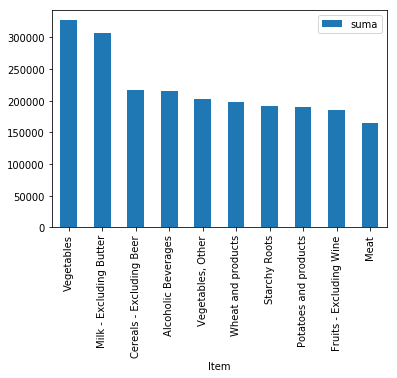

In [15]:
#Grafica top 10 productos
spain.plot(kind='bar',x='Item',y='suma')

In [21]:
#Comparamos con el resto de paises
def filter_item(df,columna,item): 
    df = df[df[columna] == item]
    return df
    
vegetables = filter_item(nueva,'Item','Vegetables')
vegetables = vegetables.groupby(['Area']).mean()
vegetables

,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.94,67.71,329.0,343.0,363.0,383.0,399.0,404.0,437.0,448.0,...,633.0,920.0,956.0,950.0,901.0,1056.0,977.0,865.0,910,885
Albania,41.15,20.17,120.0,123.0,148.0,157.0,153.0,106.0,105.0,104.0,...,593.0,594.0,605.0,587.0,650.0,636.0,748.0,791.0,796,778
Algeria,28.03,1.66,368.0,389.0,376.0,365.0,345.0,356.0,326.0,392.0,...,3902.0,3970.0,3801.0,3783.0,3707.0,4586.0,4983.0,5369.0,5884,6497
Angola,-11.20,17.87,153.0,155.0,158.0,162.0,163.0,166.0,169.0,173.0,...,375.0,360.0,411.0,393.0,892.0,1260.0,1320.0,1449.0,1375,1453
Antigua and Barbuda,17.06,-61.80,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,8.0,5.0,4.0,5.0,4.0,4.0,6.0,6,7
Argentina,-38.42,-63.62,1715.0,1770.0,1681.0,1808.0,1808.0,1811.0,1926.0,1864.0,...,2558.0,2715.0,2523.0,2654.0,2663.0,2636.0,2687.0,2868.0,3001,2858
Armenia,40.07,45.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,659.0,719.0,873.0,986.0,968.0,958.0,849.0,912.0,1016,1039
Australia,-25.27,133.78,646.0,657.0,654.0,683.0,719.0,787.0,786.0,791.0,...,2032.0,2008.0,2034.0,2118.0,2214.0,2138.0,2192.0,2180.0,2303,2400
Austria,47.52,14.55,473.0,434.0,542.0,516.0,550.0,540.0,518.0,532.0,...,836.0,767.0,785.0,797.0,849.0,848.0,888.0,922.0,879,881


In [23]:
col_list_2 = list(vegetables)
col_list_2.remove('latitude')
col_list_2.remove('longitude')

vegetables['suma'] = vegetables[col_list_2].sum(axis=1)
vegetables

,latitude,longitude,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,suma
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.94,67.71,329.0,343.0,363.0,383.0,399.0,404.0,437.0,448.0,...,920.0,956.0,950.0,901.0,1056.0,977.0,865.0,910,885,28754.0
Albania,41.15,20.17,120.0,123.0,148.0,157.0,153.0,106.0,105.0,104.0,...,594.0,605.0,587.0,650.0,636.0,748.0,791.0,796,778,18891.0
Algeria,28.03,1.66,368.0,389.0,376.0,365.0,345.0,356.0,326.0,392.0,...,3970.0,3801.0,3783.0,3707.0,4586.0,4983.0,5369.0,5884,6497,102738.0
Angola,-11.20,17.87,153.0,155.0,158.0,162.0,163.0,166.0,169.0,173.0,...,360.0,411.0,393.0,892.0,1260.0,1320.0,1449.0,1375,1453,18402.0
Antigua and Barbuda,17.06,-61.80,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,5.0,4.0,5.0,4.0,4.0,6.0,6,7,156.0
Argentina,-38.42,-63.62,1715.0,1770.0,1681.0,1808.0,1808.0,1811.0,1926.0,1864.0,...,2715.0,2523.0,2654.0,2663.0,2636.0,2687.0,2868.0,3001,2858,122599.0
Armenia,40.07,45.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,719.0,873.0,986.0,968.0,958.0,849.0,912.0,1016,1039,14034.0
Australia,-25.27,133.78,646.0,657.0,654.0,683.0,719.0,787.0,786.0,791.0,...,2008.0,2034.0,2118.0,2214.0,2138.0,2192.0,2180.0,2303,2400,72670.0
Austria,47.52,14.55,473.0,434.0,542.0,516.0,550.0,540.0,518.0,532.0,...,767.0,785.0,797.0,849.0,848.0,888.0,922.0,879,881,33322.0


In [25]:
vegetables.to_csv('production_vegetables.csv')